# Centrality Dependence of CNM EFFECTS: npdf, eloss, p_T broadening

## Setup, Import & Preprocess

In [4]:
### npDf centrality stuffs
# --------- publication styling toggles ----------
SAVE_PDF = True
SAVE_CSV = True
ADD_MINOR_TICKS = True
ALPHA_BAND = 0.22

import os, sys, numpy as np, pandas as pd, matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from pathlib import Path
sys.path.append("../npdf_code")

from npdf_data   import NPDFSystem, RpAAnalysis
from npdf_data   import note_box  # for put_note, if available
from gluon_ratio import EPPS21Ratio, GluonEPPSProvider
from glauber     import OpticalGlauber, SystemSpec

from npdf_centrality import (
    compute_df49_by_centrality,
    make_centrality_weight_dict,
    bin_rpa_vs_y,
    bin_rpa_vs_pT,
    bin_rpa_vs_centrality,
)

# styling helpers
def put_note(ax, text, loc="lower right"):
    try:
        note_box(ax, text, loc=loc)
    except Exception:
        kw = dict(ha="right" if "right" in loc else "left",
                  va="bottom" if "upper" in loc else "bottom")
        xy = (0.98, 0.95) if "upper" in loc and "right" in loc else (0.02, 0.95)
        ax.text(*xy, text, transform=ax.transAxes, fontsize=10, alpha=0.9)

def beautify_axis(ax, xlabel=None, ylabel=None, xlim=None, ylim=None):
    if xlabel: ax.set_xlabel(xlabel)
    if ylabel: ax.set_ylabel(ylabel)
    if xlim:   ax.set_xlim(*xlim)
    if ylim:   ax.set_ylim(*ylim)
    if ADD_MINOR_TICKS:
        try:
            ax.xaxis.set_minor_locator(AutoMinorLocator())
            ax.yaxis.set_minor_locator(AutoMinorLocator())
        except Exception:
            pass
    ax.tick_params(which="both", direction="in")

# paths and constants
P5_DIR   = "../input/npdf/pPb5TeV"
P8_DIR   = "../input/npdf/pPb8TeV"
EPPS_DIR = "../input/npdf/nPDFs"
OUTDIR   = Path("./output-npdf-comparisons"); OUTDIR.mkdir(exist_ok=True)

SQRTS   = { "5.02": 5023.0, "8.16": 8160.0 }
SIG_NN  = { "5.02": 67.0,   "8.16": 71.0 }

cent_bins = [(0,20),(20,40),(40,60),(60,80),(80,100)]
Y_WINDOWS = [(-4.46,-2.96,"-4.46 < y < -2.96"),
             (-1.37,0.43,"-1.37 < y < 0.43"),
             (2.03,3.53,"2.03 < y < 3.53")]

PT_RANGE       = (0.0, 20.0)
PT_RANGE_AVG   = (0.0, 15.0)   # you can also use (1.0, 15.0) if you prefer
PT_FLOOR_W     = 1.0          # this is the “physics” floor for low-pT
Y_EDGES        = np.arange(-5.0, 5.0+0.25, 0.5)
P_EDGES        = np.arange(0.0, 15.0+2.5, 2.5)

COLORS = {"5.02":"tab:blue", "8.16":"tab:red"}
LSTYLE = {"5.02":"-",        "8.16":"--"}
DPI = 150
plt.rcParams.update({"figure.dpi":DPI, "font.size":12})

# Build providers
epps5 = GluonEPPSProvider(EPPS21Ratio(A=208,  path=EPPS_DIR),
                          sqrt_sNN_GeV=5023.0, m_state_GeV="charmonium",
                          y_sign_for_xA=-1)
epps8 = GluonEPPSProvider(EPPS21Ratio(A=208,  path=EPPS_DIR),
                          sqrt_sNN_GeV=8160.0, m_state_GeV="charmonium",
                          y_sign_for_xA=-1)

gl5 = OpticalGlauber(SystemSpec("pA", SQRTS["5.02"], A=208, sigma_nn_mb=SIG_NN["5.02"]))
gl8 = OpticalGlauber(SystemSpec("pA", SQRTS["8.16"], A=208, sigma_nn_mb=SIG_NN["8.16"]))

# NPDF systems & σ_pA/σ_pp members (on common grid)
ana = RpAAnalysis()

sys5 = NPDFSystem.from_folder(P5_DIR, kick="pp", name="p+Pb 5.02 TeV")
sys8 = NPDFSystem.from_folder(P8_DIR, kick="pp", name="p+Pb 8.16 TeV")

base5, r0_5, M5 = ana.compute_rpa_members(
    sys5.df_pp, sys5.df_pa, sys5.df_errors,
    join="intersect", lowpt_policy="drop",
    pt_shift_min=PT_FLOOR_W,
    shift_if_r_below=0.0
)
base8, r0_8, M8 = ana.compute_rpa_members(
    sys8.df_pp, sys8.df_pa, sys8.df_errors,
    join="intersect", lowpt_policy="drop",
    pt_shift_min=PT_FLOOR_W,
    shift_if_r_below=0.0
)

# Weighting mode & knobs for binning
WEIGHT_MODE   = "pp@local"   # or "pa@y0", etc.
Y_REF         = 0.0
CENT_EXP_C0   = 0.25

# y-shift knob (Ramona suggestion) as fraction of Δy
Y_SHIFT_FRACTION = 2.0   # tune as you like
NB_BSAMPLES      = 5

# centrality weights for MB (w(c) scheme)
WCENT = make_centrality_weight_dict(cent_bins, c0=CENT_EXP_C0)
print("WCENT =", WCENT)

[Glauber] TA(r) LUT: A=208 d=0.549 r≤50 fm, dr=0.02, z≤50 fm
[Glauber] ∫T_A d^2x ≈ 208.483 (target A=208)
[Glauber] Tabulating T_AA(b), T_pA(b)…
[Glauber] σ_tot^AA ≈ 7718.37 mb, σ_tot^pA ≈ 1909.03 mb
[Glauber] TA(r) LUT: A=208 d=0.549 r≤50 fm, dr=0.02, z≤50 fm
[Glauber] ∫T_A d^2x ≈ 208.483 (target A=208)
[Glauber] Tabulating T_AA(b), T_pA(b)…
[Glauber] σ_tot^AA ≈ 7757.76 mb, σ_tot^pA ≈ 1925.90 mb
WCENT = {'0-20%': 0.5609451038411363, '20-40%': 0.25204888243556506, '40-60%': 0.11325286325167577, '60-80%': 0.050887791728184854, '80-100%': 0.022865358743438213}


In [5]:
## nPDF
# build per-centrality RpA tables (5 & 8 TeV) npdf centrality dependence
df49_by_cent_5, K_by_cent_5, SA_all_5, Y_SHIFT_5 = compute_df49_by_centrality(
    base5, r0_5, M5, epps5, gl5, cent_bins,
    nb_bsamples=NB_BSAMPLES,
    y_shift_fraction=Y_SHIFT_FRACTION,
)
df49_by_cent_8, K_by_cent_8, SA_all_8, Y_SHIFT_8 = compute_df49_by_centrality(
    base8, r0_8, M8, epps8, gl8, cent_bins,
    nb_bsamples=NB_BSAMPLES,
    y_shift_fraction=Y_SHIFT_FRACTION,
)

energy_ctx = {
    "5.02": dict(df49_by_cent=df49_by_cent_5,
                 df_pp=sys5.df_pp,
                 df_pa=sys5.df_pa,
                 gluon=epps5),
    "8.16": dict(df49_by_cent=df49_by_cent_8,
                 df_pp=sys8.df_pp,
                 df_pa=sys8.df_pa,
                 gluon=epps8),
}
ACTIVE_ENERGIES = ["5.02", "8.16"]

In [6]:
## eloss and pT broadening setup
import sys, os, math
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import replace
import torch

sys.path.append("../eloss_code")

from particle  import Particle
from glauber   import SystemSpec, OpticalGlauber
from coupling  import alpha_s_provider
import quenching_fast as QF

# NEW: import module
from eloss_cronin_centrality import (
    rpa_band_vs_y,
    rpa_band_vs_pT,
    rpa_band_vs_centrality,
    plot_RpA_vs_y_components_per_centrality,
    plot_RpA_vs_pT_components_per_centrality,
    plot_RpA_vs_centrality_components_band,
    make_centrality_weight_dict,   # if you want explicit weights
)

roots5, roots8   = 5023.0, 8160.0
sigma_nn_5, sigma_nn_8 = 67.6, 71.0
A = 208
device = "cuda" if (QF._HAS_TORCH and torch.cuda.is_available()) else "cpu"

P_charmonia  = Particle(family="charmonia",  state="avg")
P_bottomonia = Particle(family="bottomonia", state="avg")

alpha_cst = alpha_s_provider(mode="constant", alpha0=0.5)
alpha_s   = alpha_cst

gl5 = OpticalGlauber(SystemSpec("pA", roots5, A=A, sigma_nn_mb=sigma_nn_5))
gl8 = OpticalGlauber(SystemSpec("pA", roots8, A=A, sigma_nn_mb=sigma_nn_8))

Lmb_5 = gl5.leff_minbias_pA()
Lmb_8 = gl8.leff_minbias_pA()

cent_bins = [(0,20),(20,40),(40,60),(60,80),(80,100)]
RAPIDITY_WINDOWS   = [(-4.46,-2.96), (-1.37,0.43), (2.03,3.53)]
Q0_PAIR = (0.05, 0.09)

QP5_base = QF.QuenchParams(
    qhat0        = 0.075,
    lp_fm        = 1.5,
    LA_fm        = Lmb_5,
    LB_fm        = Lmb_5,
    lambdaQCD    = 0.25,
    roots_GeV    = roots5,
    alpha_of_mu  = alpha_cst,
    alpha_scale  = "mT",
    use_hard_cronin = True,
    mapping      = "exp",
    device       = device,
)
QP8_base = replace(QP5_base,
                   roots_GeV = roots8,
                   LA_fm     = Lmb_8,
                   LB_fm     = Lmb_8)

[Glauber] TA(r) LUT: A=208 d=0.549 r≤50 fm, dr=0.02, z≤50 fm
[Glauber] ∫T_A d^2x ≈ 208.483 (target A=208)
[Glauber] Tabulating T_AA(b), T_pA(b)…
[Glauber] σ_tot^AA ≈ 7724.42 mb, σ_tot^pA ≈ 1911.63 mb
[Glauber] TA(r) LUT: A=208 d=0.549 r≤50 fm, dr=0.02, z≤50 fm
[Glauber] ∫T_A d^2x ≈ 208.483 (target A=208)
[Glauber] Tabulating T_AA(b), T_pA(b)…
[Glauber] σ_tot^AA ≈ 7757.76 mb, σ_tot^pA ≈ 1925.90 mb


## $R_{pA}(b,y,p_T)$ with Binned & Hessian Band

## $R_{pA}$ vs $y$

### nPDF

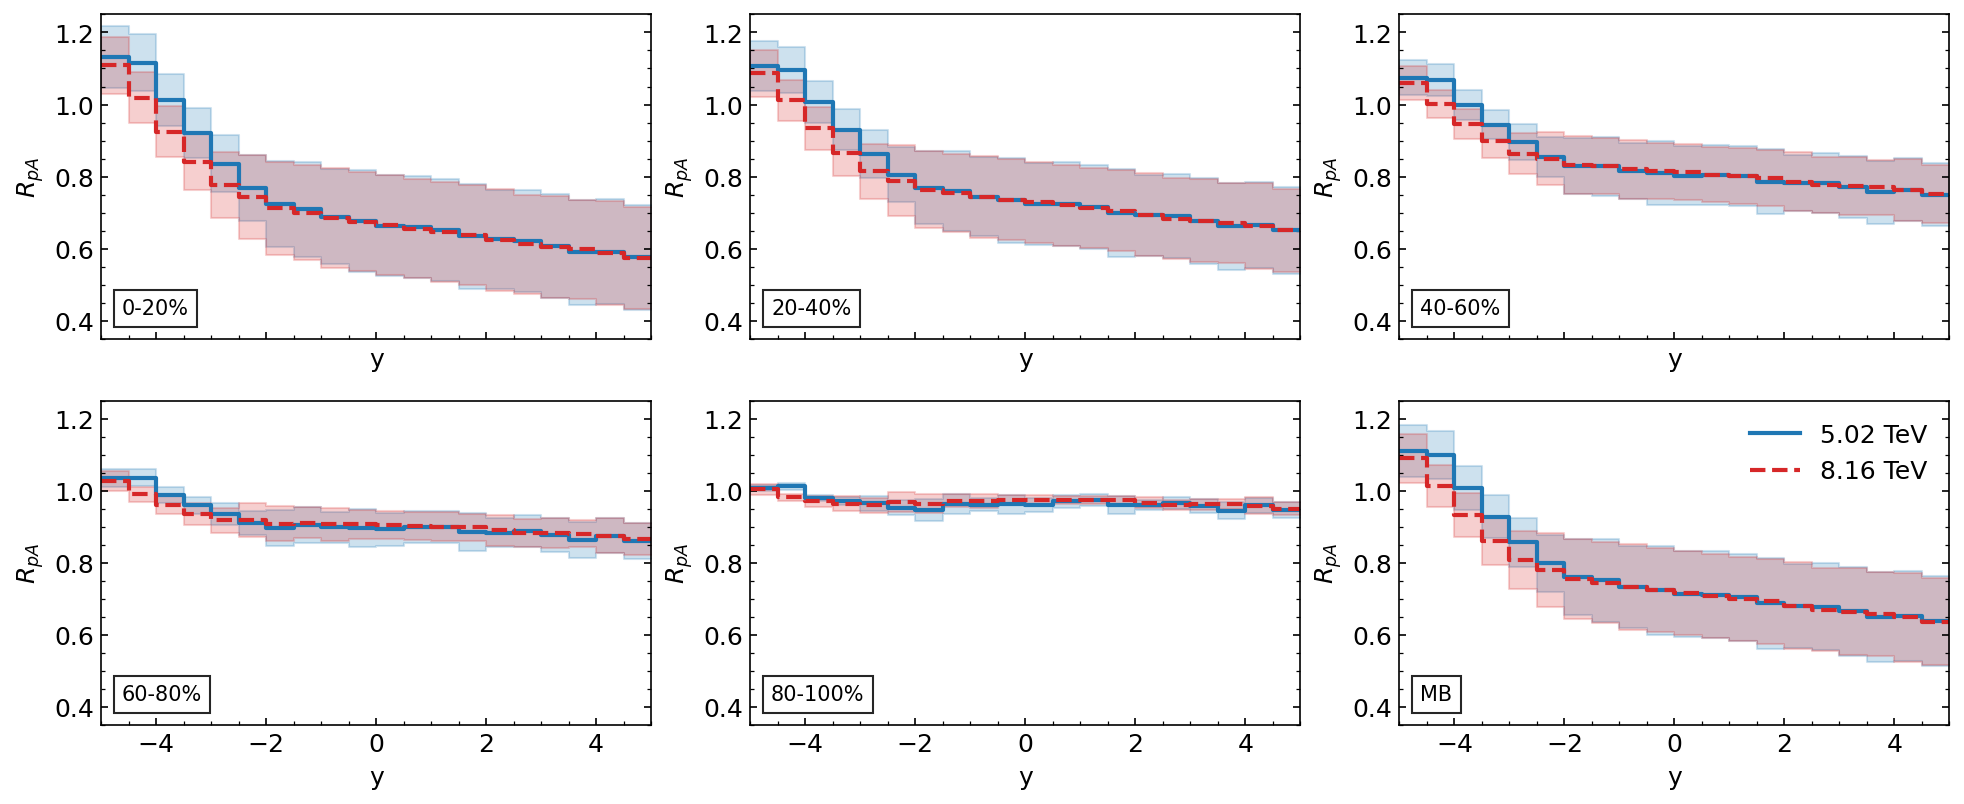

In [ ]:
## npdf vs y
bins_vs_y = {}
for E in ACTIVE_ENERGIES:
    ctx = energy_ctx[E]
    bins_vs_y[E] = bin_rpa_vs_y(
        ctx["df49_by_cent"],
        ctx["df_pp"],
        ctx["df_pa"],
        ctx["gluon"],
        cent_bins=cent_bins,
        y_edges=Y_EDGES,
        pt_range_avg=PT_RANGE_AVG,
        weight_mode=WEIGHT_MODE,
        y_ref=Y_REF,
        pt_floor_w=PT_FLOOR_W,
        wcent_dict=WCENT,
        include_mb=True,
    )

tags_y = [f"{a}-{b}%" for (a,b) in cent_bins] + ["MB"]
Y_NCOLS = 3
n_pan   = len(tags_y)
n_rows  = int(np.ceil(n_pan / Y_NCOLS))
n_cols  = Y_NCOLS

fig, axes = plt.subplots(n_rows, n_cols,
                         figsize=(5.3*n_cols, 3.0*n_rows),
                         dpi=DPI, sharex=True, sharey=True)
axes = np.atleast_1d(axes).ravel()

handles_, labels_ = [], []

for ip, tag in enumerate(tags_y):
    ax = axes[ip]

    for E in ACTIVE_ENERGIES:
        data = bins_vs_y[E][tag]
        yL  = data["y_left"]
        yR  = data["y_right"]
        r0  = data["r_central"]
        rlo = data["r_lo"]
        rhi = data["r_hi"]

        if len(yL) == 0:
            continue

        dx = yR[0] - yL[0] if len(yL) > 1 else (Y_EDGES[1] - Y_EDGES[0])
        xC = np.r_[yL, yR[-1] + dx]
        yC = np.r_[r0, r0[-1]]
        yLo = np.r_[rlo, rlo[-1]]
        yHi = np.r_[rhi, rhi[-1]]

        ln, = ax.step(xC, yC, where="post",
                      color=COLORS[E], ls=LSTYLE[E], lw=2.0,
                      label=f"{E} TeV")
        ax.fill_between(xC, yLo, yHi, step="post",
                        color=COLORS[E], alpha=ALPHA_BAND)

        handles_.append(ln)
        labels_.append(f"{E} TeV")

        if SAVE_CSV:
            out = pd.DataFrame(dict(
                y_left=yL,
                y_right=yR,
                r_central=r0,
                r_lo=rlo,
                r_hi=rhi,
            ))
            out.to_csv(
                OUTDIR / f"data_rpa_vs_y_{tag.replace('%','pct')}_{E.replace('.','p')}TeV.csv",
                index=False
            )

    beautify_axis(ax, xlabel="y", ylabel=r"$R_{pA}$",
                  xlim=(Y_EDGES[0], Y_EDGES[-1]), ylim=(0.35, 1.25))
    ax.yaxis.set_ticks_position("both")
    ax.tick_params(axis="y", which="both", right=True, labelleft=True, labelright=False)
    put_note(ax, tag, loc="lower left")

for k in range(n_pan, len(axes)):
    fig.delaxes(axes[k])

uniq = {}
for h, l in zip(handles_, labels_):
    uniq[l] = h

mb_idx = tags_y.index("MB") if "MB" in tags_y else 0
legend_ax = axes[mb_idx]
legend_ax.legend(list(uniq.values()), list(uniq.keys()),
                 loc="upper right", frameon=False)

plt.subplots_adjust(top=0.90, hspace=0.19, wspace=0.18)
if SAVE_PDF:
    fig.savefig(OUTDIR / f"rpa_vs_y_panels_{WEIGHT_MODE}.pdf", bbox_inches="tight")
plt.show()

### Eloss & $p_T$ broadening

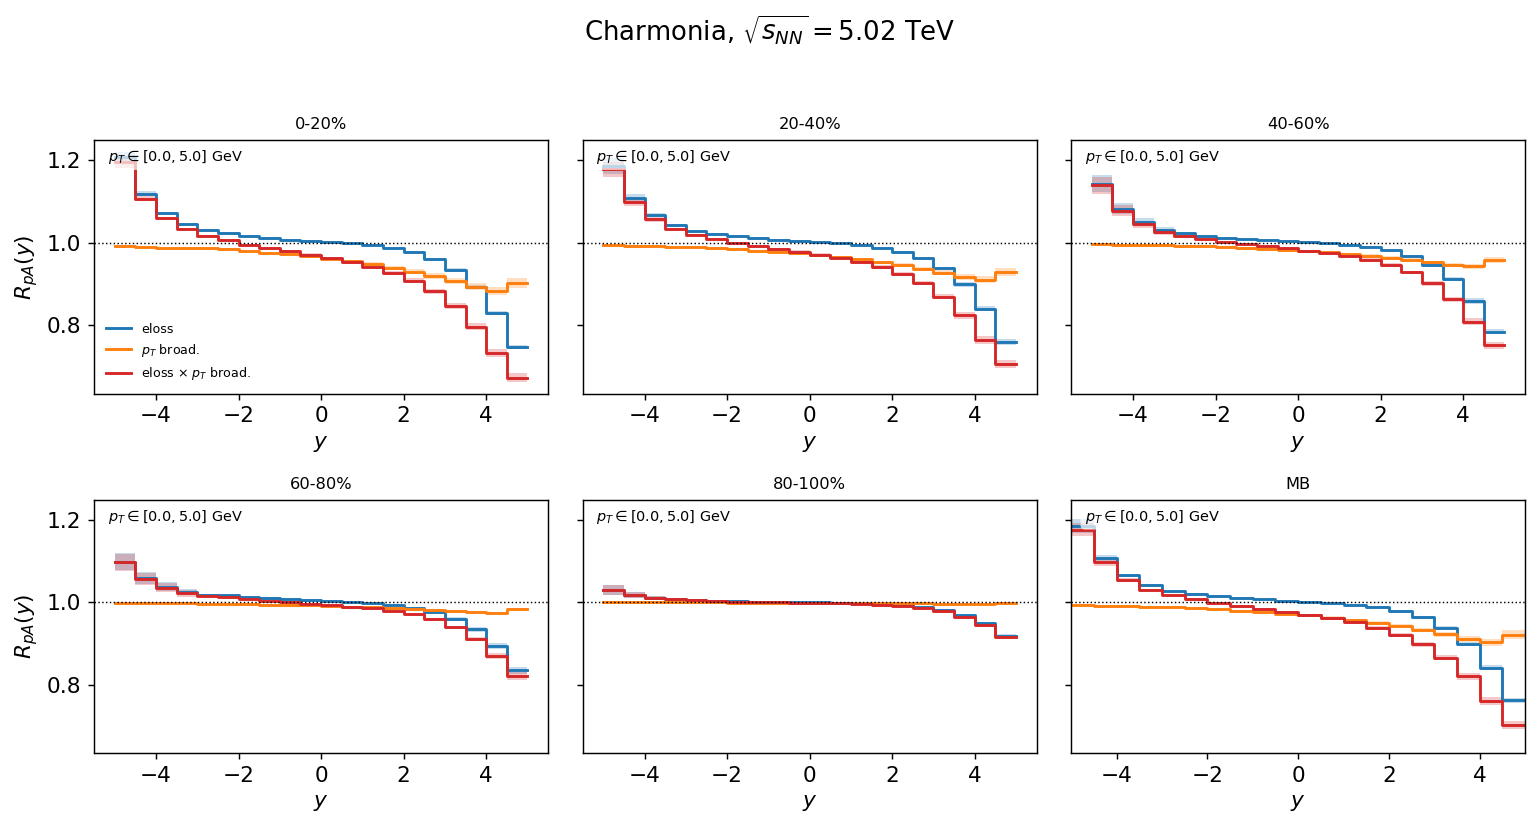

In [5]:
## eloss, pT braoadening and eloss x pT broadening components
y_edges  = np.arange(-5.0, 5.0+0.5, 0.5)
pt_range = (0.0, 5.0)

fig, axes = plot_RpA_vs_y_components_per_centrality(
    P_charmonia, roots5, QP5_base,
    gl5, cent_bins,
    y_edges, pt_range,
    show_components=("loss", "broad", "total"),
    q0_pair=Q0_PAIR,
    p0_scale_pair=(0.9, 1.1),
    Ny_bin=12, Npt_bin=24,
    weight_kind="pp",
    weight_ref_y="local",
    include_MB=True,
    ncols=3,
    step=True,
    suptitle=r"Charmonia, $\sqrt{s_{NN}}=5.02$ TeV",
)

plt.savefig(
    "RpA_vs_y_components_by_centrality_charmonia_5TeV.pdf",
    dpi=300, bbox_inches="tight"
)
plt.show()

## $R_{pA}$ vs $p_T$

### nPDF

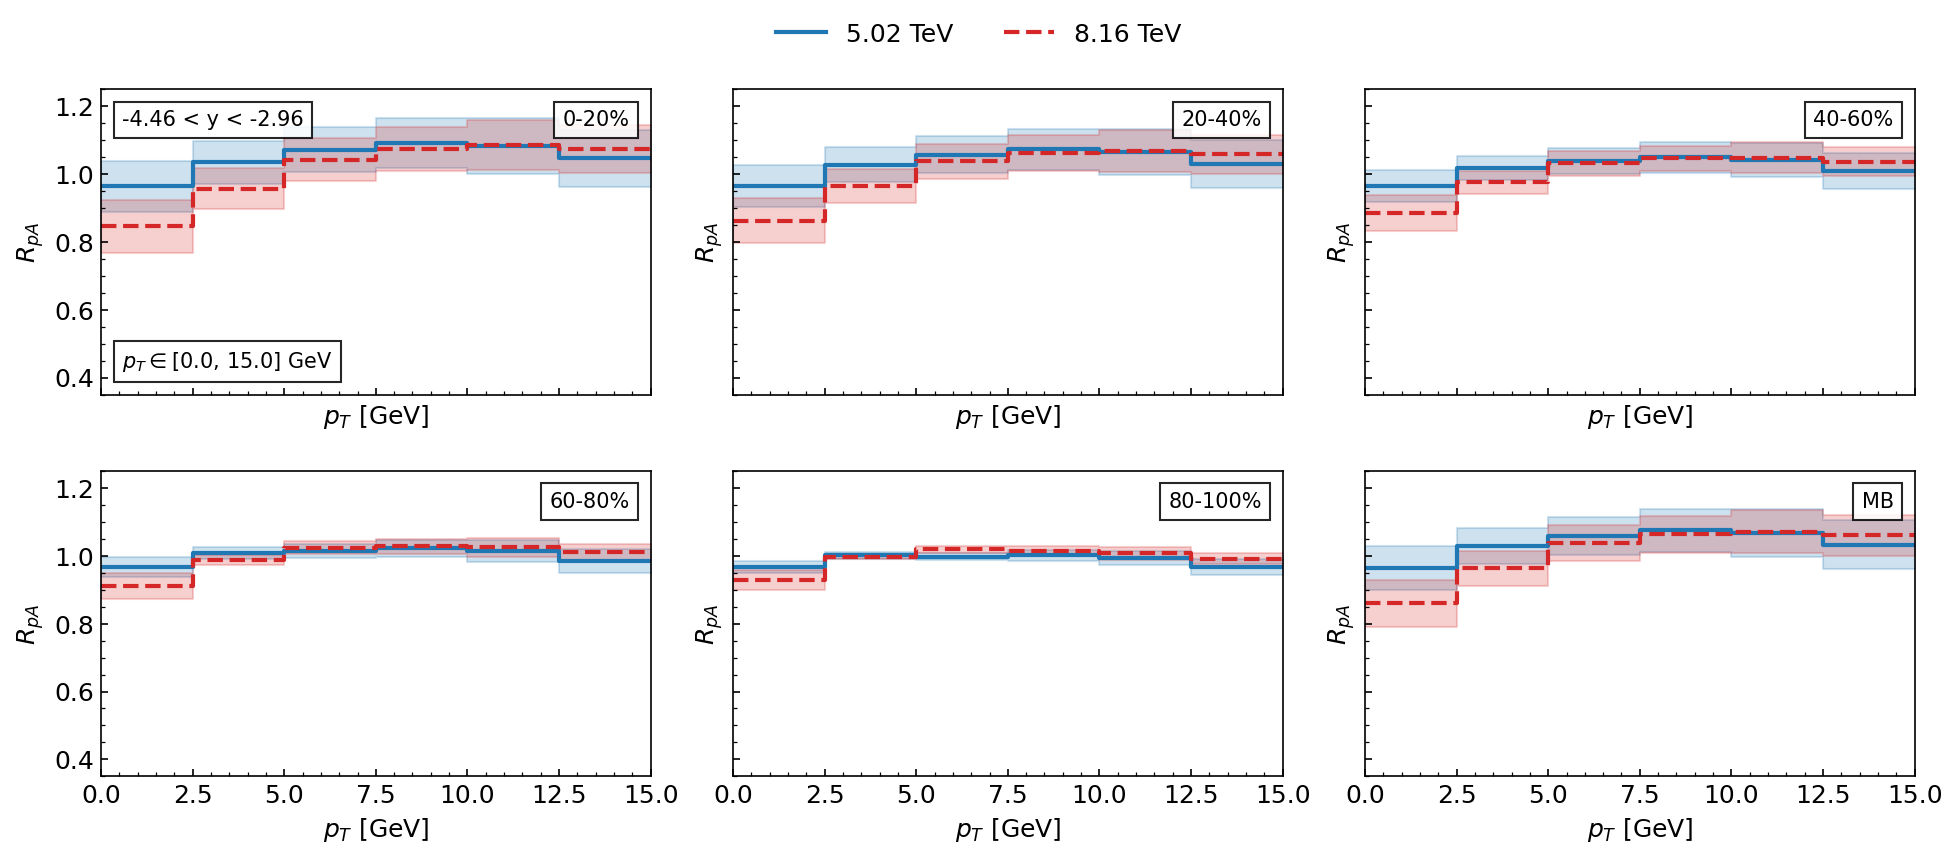

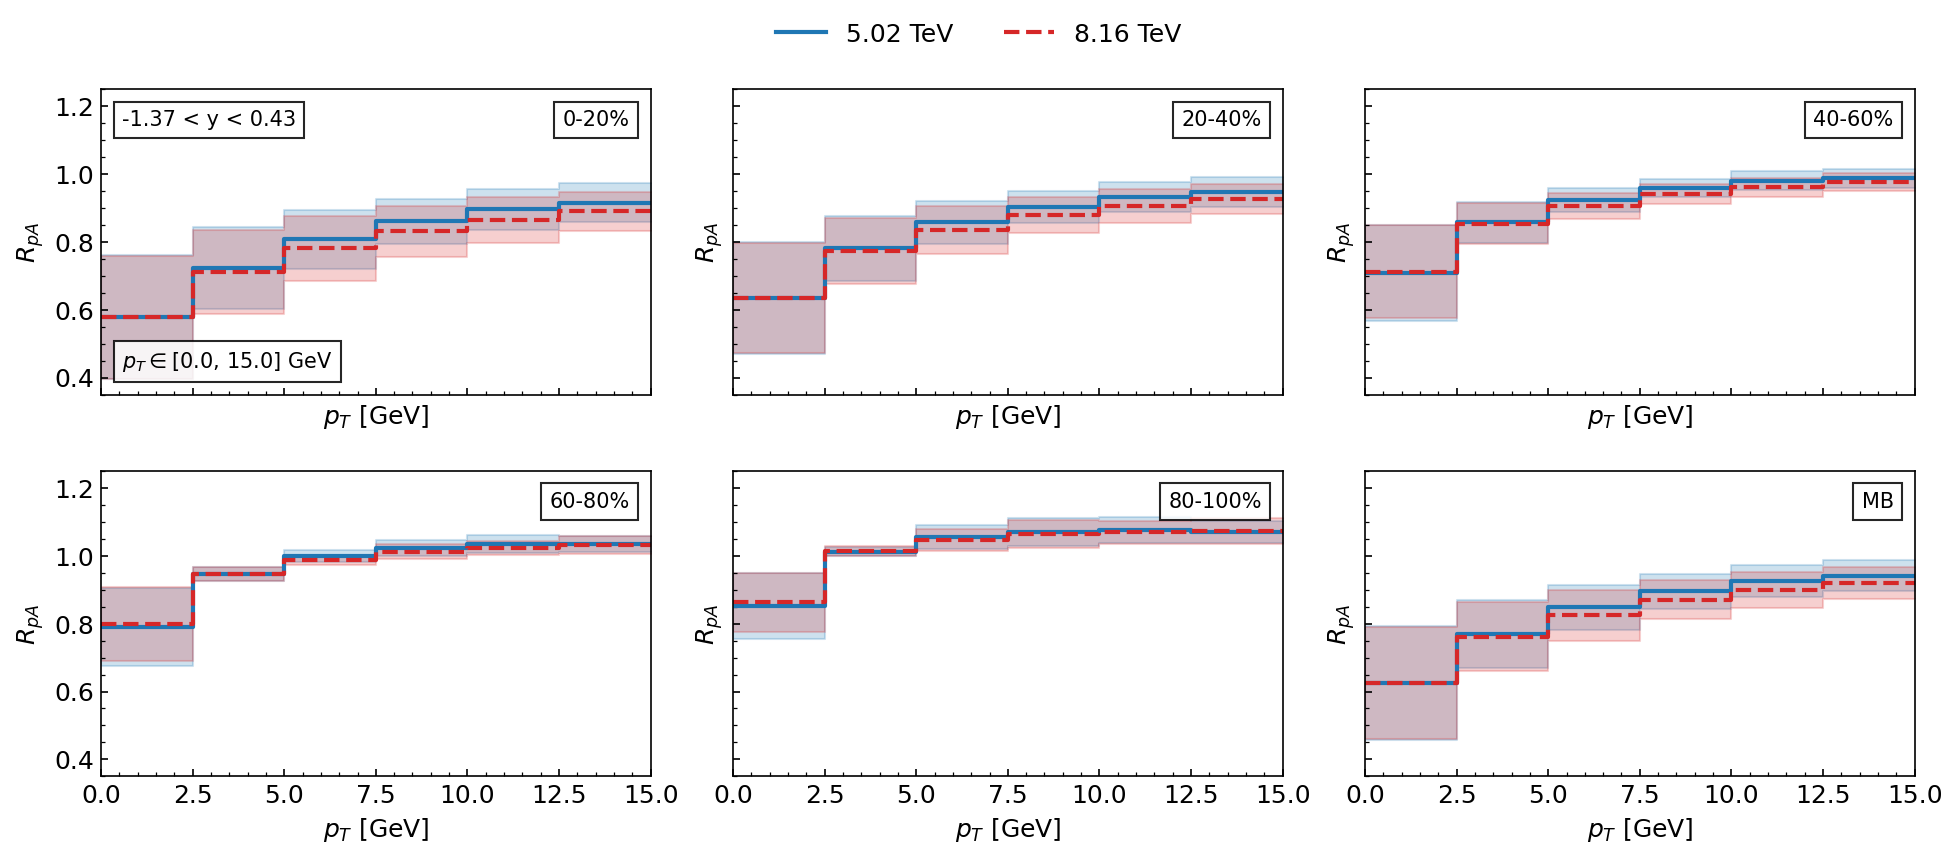

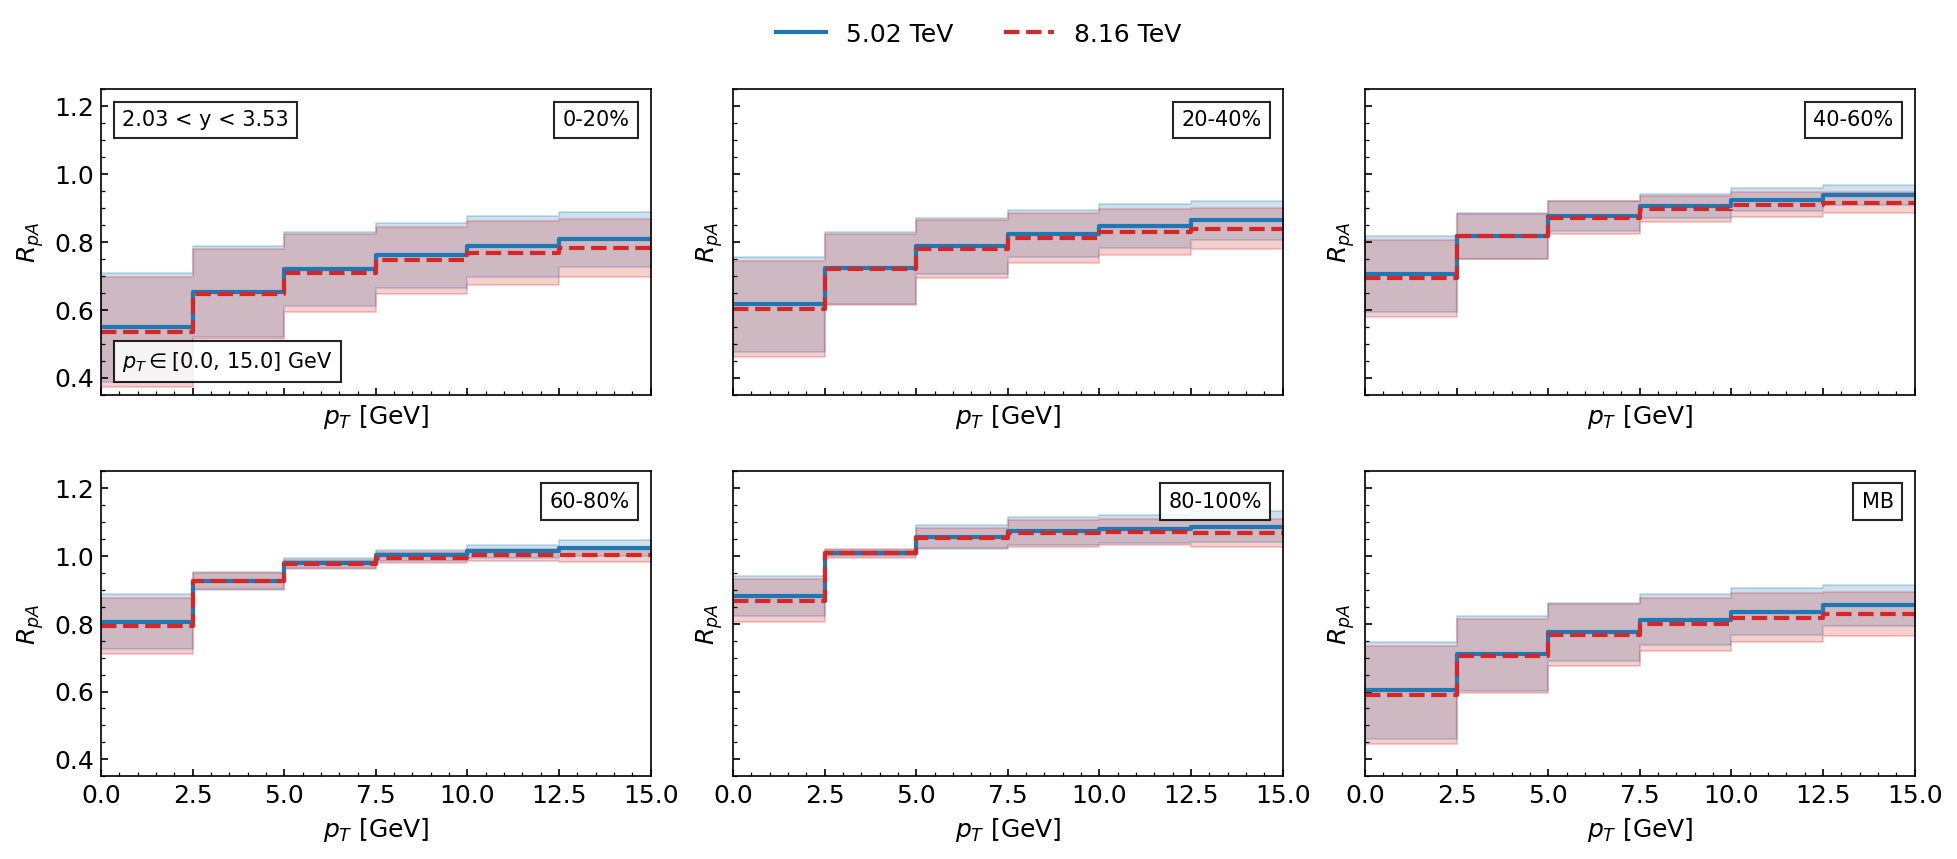

In [ ]:
## npdf vs pT
bins_vs_pT = {E: {} for E in ACTIVE_ENERGIES}
for E in ACTIVE_ENERGIES:
    ctx = energy_ctx[E]
    for (y0, y1, name) in Y_WINDOWS:
        bins_vs_pT[E][name] = bin_rpa_vs_pT(
            ctx["df49_by_cent"],
            ctx["df_pp"],
            ctx["df_pa"],
            ctx["gluon"],
            cent_bins=cent_bins,
            pt_edges=P_EDGES,
            y_window=(y0, y1),
            weight_mode=WEIGHT_MODE,
            y_ref=Y_REF,
            pt_floor_w=PT_FLOOR_W,
            wcent_dict=WCENT,
            include_mb=True,
        )

def plot_rpa_vs_pT_panels_window(y0, y1, name,
                                 ncols=3,
                                 ylim=(0.35, 1.25)):

    tags_pt = [f"{a}-{b}%" for (a,b) in cent_bins] + ["MB"]
    n_pan   = len(tags_pt)
    n_rows  = int(np.ceil(n_pan / ncols))

    fig, axes = plt.subplots(n_rows, ncols,
                             figsize=(5.2*ncols, 2.9*n_rows),
                             dpi=DPI, sharex=True, sharey=True)
    axes = np.atleast_1d(axes).ravel()

    handles_, labels_ = [], []

    for ip, tag in enumerate(tags_pt):
        ax = axes[ip]

        for E in ACTIVE_ENERGIES:
            data = bins_vs_pT[E][name][tag]
            pL  = data["pt_left"]
            pR  = data["pt_right"]
            r0  = data["r_central"]
            rlo = data["r_lo"]
            rhi = data["r_hi"]

            if len(pL) == 0:
                continue

            dx = pR[0] - pL[0] if len(pL) > 1 else (P_EDGES[1] - P_EDGES[0])
            xC = np.r_[pL, pR[-1] + dx]
            yC = np.r_[r0, r0[-1]]
            yLo = np.r_[rlo, rlo[-1]]
            yHi = np.r_[rhi, rhi[-1]]

            ln, = ax.step(xC, yC, where="post",
                          color=COLORS[E], ls=LSTYLE[E], lw=2.0,
                          label=f"{E} TeV")
            ax.fill_between(xC, yLo, yHi, step="post",
                            color=COLORS[E], alpha=ALPHA_BAND)

            handles_.append(ln); labels_.append(f"{E} TeV")

            if SAVE_CSV:
                out = pd.DataFrame(dict(
                    pt_left=pL,
                    pt_right=pR,
                    r_central=r0,
                    r_lo=rlo,
                    r_hi=rhi,
                ))
                out.to_csv(
                    OUTDIR / f"data_rpa_vs_pT_{tag.replace('%','pct')}_{name}_{E.replace('.','p')}TeV.csv".replace(' ','_'),
                    index=False
                )

        beautify_axis(ax, xlabel=r"$p_T$ [GeV]", ylabel=r"$R_{pA}$",
                      xlim=(P_EDGES[0], P_EDGES[-1]), ylim=ylim)
        put_note(ax, tag, loc="upper right")

    for k in range(n_pan, len(axes)):
        fig.delaxes(axes[k])

    put_note(axes[0], f"{name}", loc="upper left")
    put_note(axes[0],
             rf"$p_T\in[{PT_RANGE_AVG[0]},\,{PT_RANGE_AVG[1]}]$ GeV",
             loc="lower left")

    uniq = {}
    for h, l in zip(handles_, labels_):
        uniq[l] = h
    fig.legend(list(uniq.values()), list(uniq.keys()),
               loc="upper center", ncol=3, frameon=False)

    plt.subplots_adjust(top=0.90, hspace=0.25, wspace=0.15)
    if SAVE_PDF:
        fig.savefig(OUTDIR / f"rpa_vs_pT_panels_{name.replace(' ','_')}_{WEIGHT_MODE}.pdf",
                    bbox_inches="tight")
    plt.show()

for (y0, y1, name) in Y_WINDOWS:
    plot_rpa_vs_pT_panels_window(y0, y1, name, ncols=3)

### Eloss & $p_T$ broadening

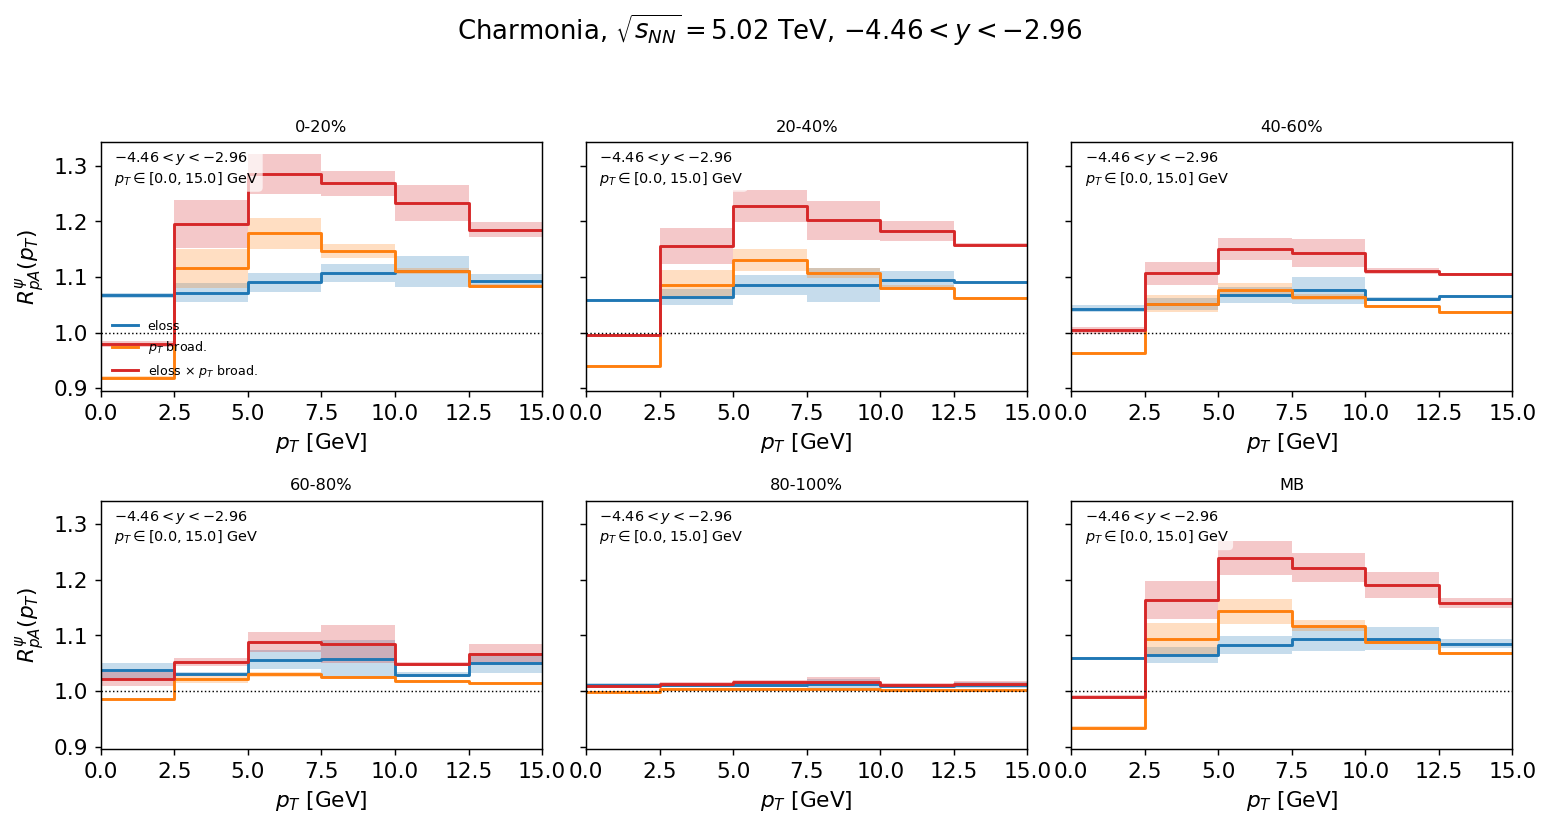

<Figure size 960x720 with 0 Axes>

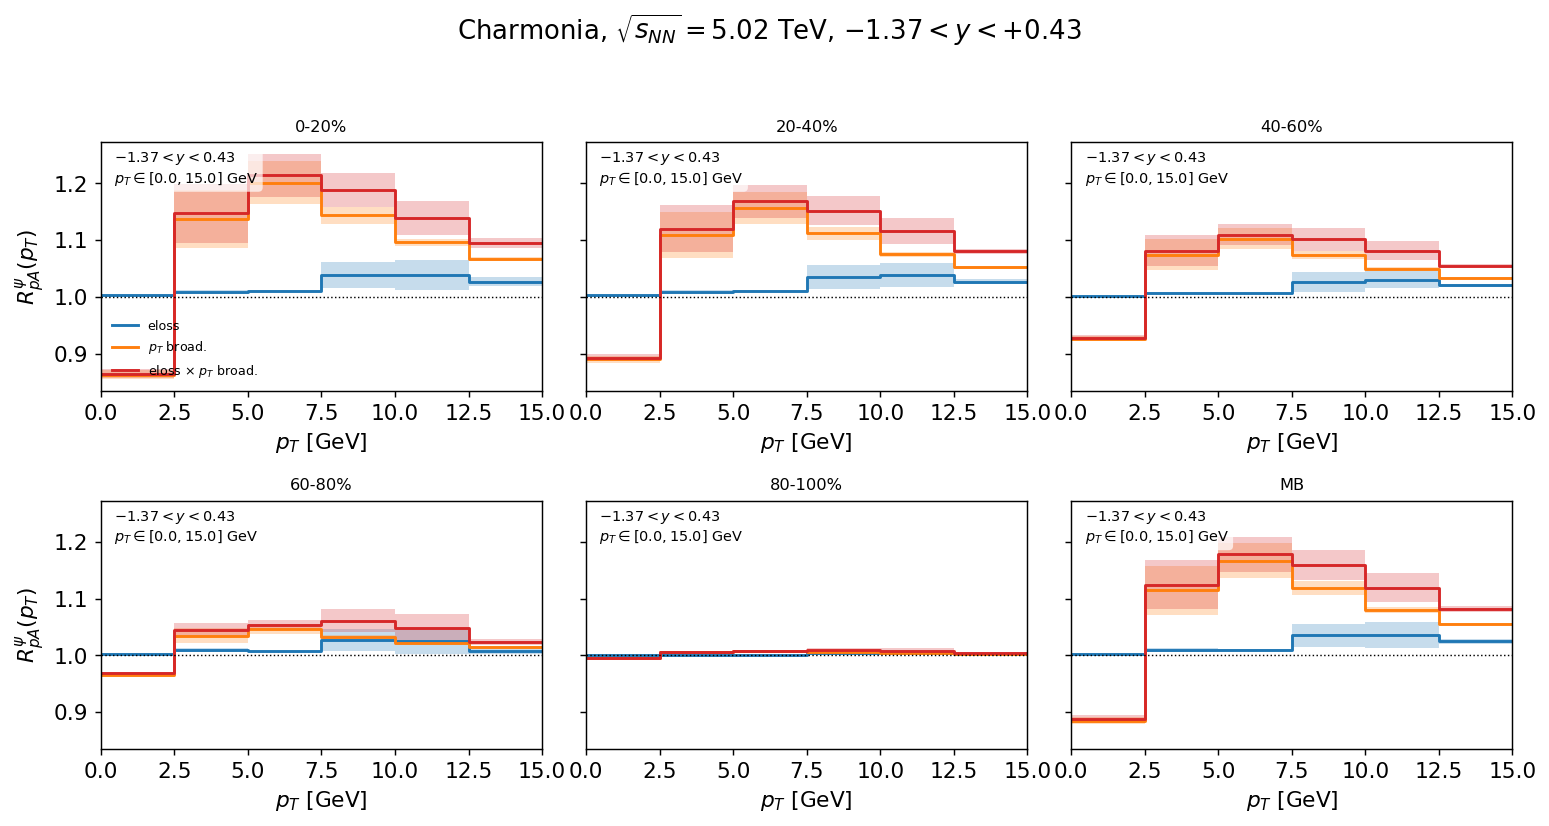

<Figure size 960x720 with 0 Axes>

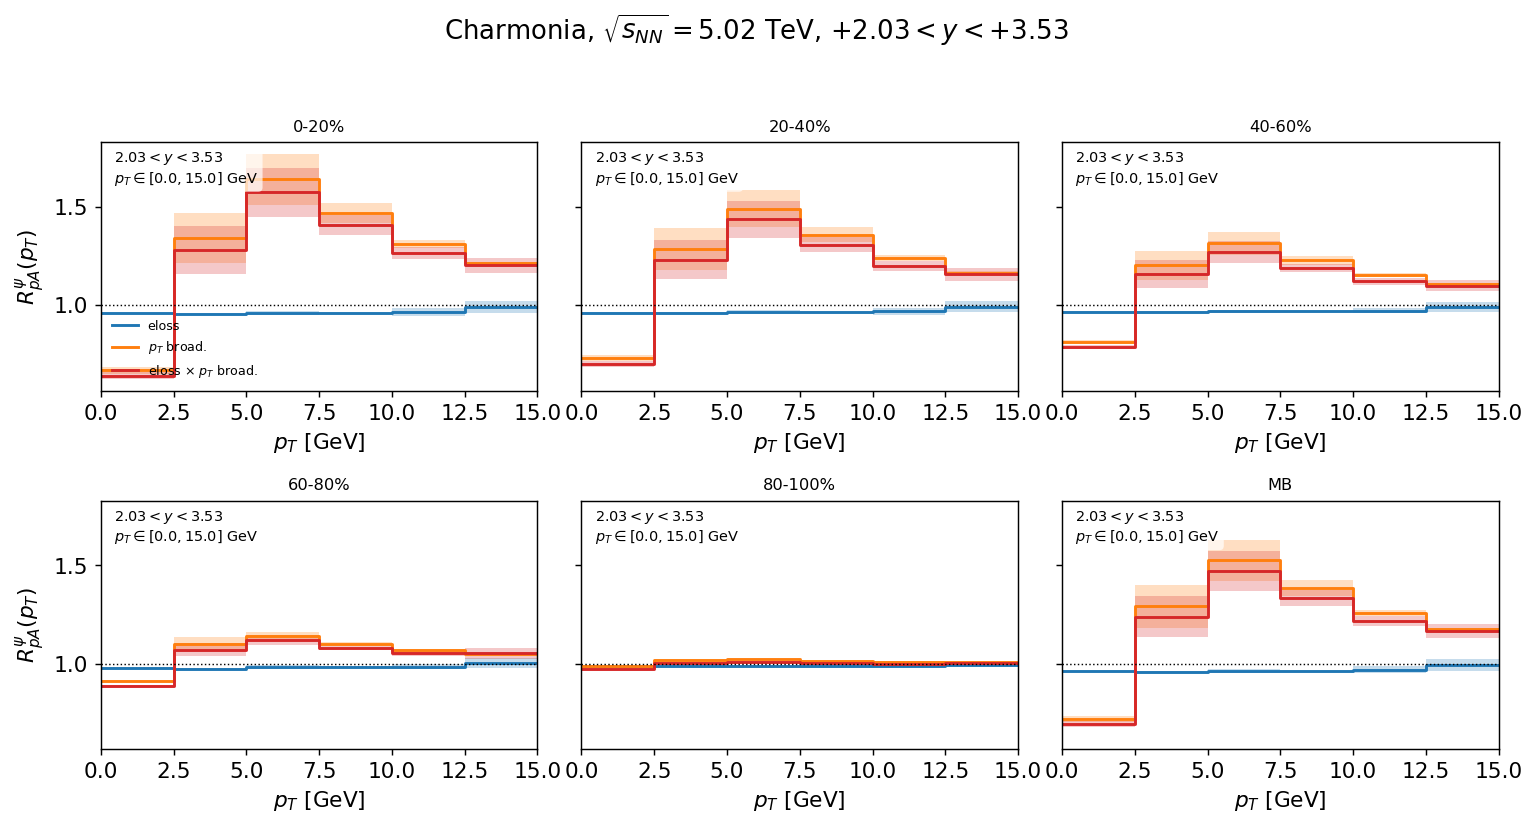

<Figure size 960x720 with 0 Axes>

In [ ]:
## eloss, pT broadening and eloss x pT broadening components
pT_edges = np.arange(0.0, 15.0+2.5, 2.5)

for yr in RAPIDITY_WINDOWS:
    fig, axes = plot_RpA_vs_pT_components_per_centrality(
        P_charmonia, roots5, QP5_base,
        gl5, cent_bins,
        pT_edges, yr,
        show_components=("loss", "broad", "total"),
        q0_pair=Q0_PAIR,
        p0_scale_pair=(0.9, 1.1),
        Ny_bin=12, Npt_bin=24,
        weight_kind="pp",
        weight_ref_y="local",
        include_MB=True,
        ncols=3,
        step=True,
        suptitle=(
            r"Charmonia, $\sqrt{s_{NN}}=5.02$ TeV, "
            + rf"${yr[0]:+.2f}<y<{yr[1]:+.2f}$"
        ),
        ylabel=r"$R^{\psi}_{pA}(p_T)$",
    )

    fname = (
        f"R_components_pA_vs_pT_charmonia_5TeV_"
        f"y({yr[0]:+.2f},{yr[1]:+.2f}).pdf"
    )
    plt.show()
    plt.savefig(fname, dpi=300, bbox_inches="tight")

## $R_{pA}$ vs Centrality

### nPDF

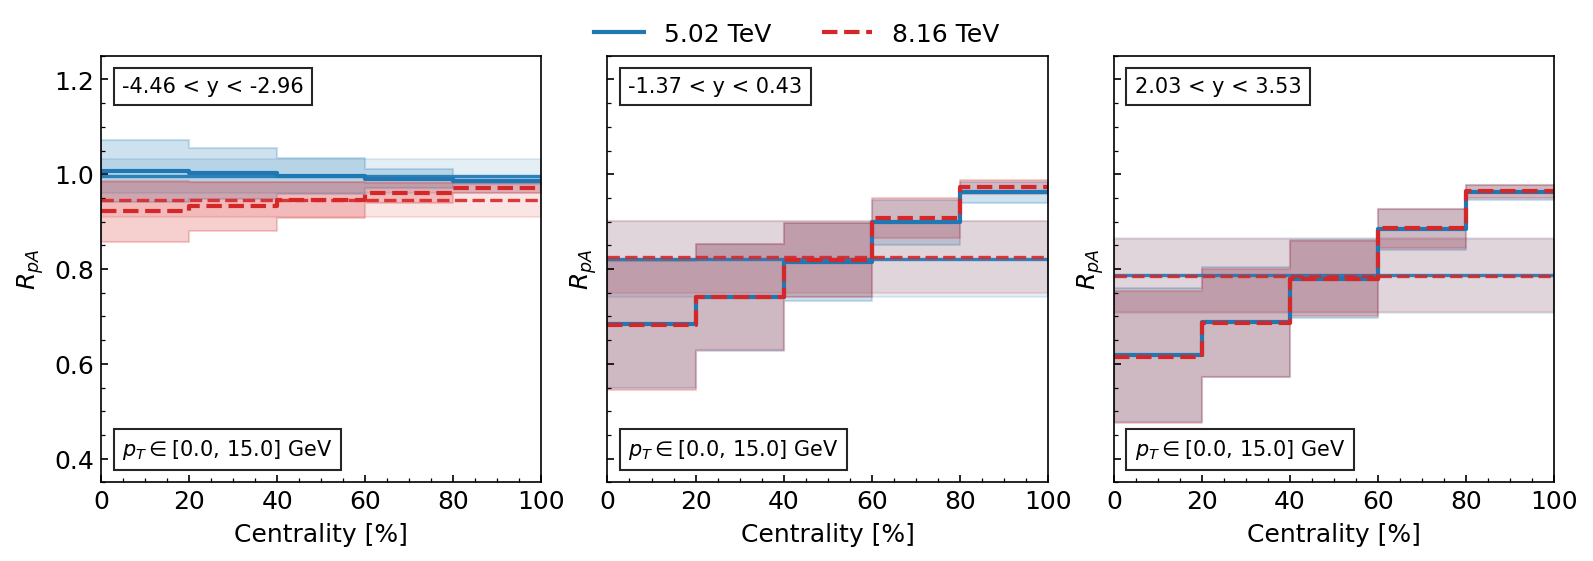

In [ ]:
## npdf VS centrality
bins_vs_cent = {E: {} for E in ACTIVE_ENERGIES}
for E in ACTIVE_ENERGIES:
    ctx = energy_ctx[E]
    for (y0, y1, name) in Y_WINDOWS:
        bins_vs_cent[E][name] = bin_rpa_vs_centrality(
            ctx["df49_by_cent"],
            ctx["df_pp"],
            ctx["df_pa"],
            ctx["gluon"],
            cent_bins=cent_bins,
            y_window=(y0, y1),
            pt_range_avg=PT_RANGE_AVG,
            weight_mode=WEIGHT_MODE,
            y_ref=Y_REF,
            pt_floor_w=PT_FLOOR_W,
        )

fig, axes = plt.subplots(1, 3, figsize=(12.5,3.6), dpi=DPI, sharey=True)
handles_, labels_ = [], []

for ax, (y0, y1, name) in zip(axes, Y_WINDOWS):
    for E in ACTIVE_ENERGIES:
        data = bins_vs_cent[E][name]
        cL   = data["cent_left"]
        cR   = data["cent_right"]
        Rc   = data["r_central"]
        Rlo  = data["r_lo"]
        Rhi  = data["r_hi"]

        xC  = np.r_[cL, 100.0]
        yC  = np.r_[Rc, Rc[-1]]
        yLo = np.r_[Rlo, Rlo[-1]]
        yHi = np.r_[Rhi, Rhi[-1]]

        ln, = ax.step(xC, yC, where="post",
                      color=COLORS[E], ls=LSTYLE[E],
                      lw=2.0, label=f"{E} TeV")
        ax.fill_between(xC, yLo, yHi, step="post",
                        color=COLORS[E], alpha=ALPHA_BAND)
        handles_.append(ln); labels_.append(f"{E} TeV")

        # MB line + band from bin_rpa_vs_centrality
        mb_c  = data["mb_r_central"]
        mb_lo = data["mb_r_lo"]
        mb_hi = data["mb_r_hi"]

        ax.hlines([mb_c], 0, 100, colors=COLORS[E],
                  linestyles=LSTYLE[E], lw=1.6, alpha=0.9)
        ax.fill_between([0,100], [mb_lo, mb_lo], [mb_hi, mb_hi],
                        color=COLORS[E], alpha=0.12)

        if SAVE_CSV:
            out = pd.DataFrame(dict(
                cent_left=cL,
                cent_right=cR,
                r_central=Rc,
                r_lo=Rlo,
                r_hi=Rhi,
            ))
            out.to_csv(
                OUTDIR / f"data_rpa_vs_centrality_{name}_{E.replace('.','p')}TeV.csv".replace(' ','_'),
                index=False
            )

    beautify_axis(ax, xlabel="Centrality [%]", ylabel=r"$R_{pA}$",
                  xlim=(0,100), ylim=(0.35,1.25))
    put_note(ax, name, loc="upper left")
    put_note(ax,
             rf"$p_T\in[{PT_RANGE_AVG[0]},\,{PT_RANGE_AVG[1]}]$ GeV",
             loc="lower left")

uniq = {}
for h, l in zip(handles_, labels_):
    uniq[l] = h
fig.legend(list(uniq.values()), list(uniq.keys()),
           loc="upper center", ncol=2, frameon=False)

plt.subplots_adjust(top=0.90, wspace=0.15)
if SAVE_PDF:
    fig.savefig(OUTDIR / f"rpa_vs_centrality_{WEIGHT_MODE}.pdf", bbox_inches="tight")
plt.show()

### Eloss & $p_T$ broadening

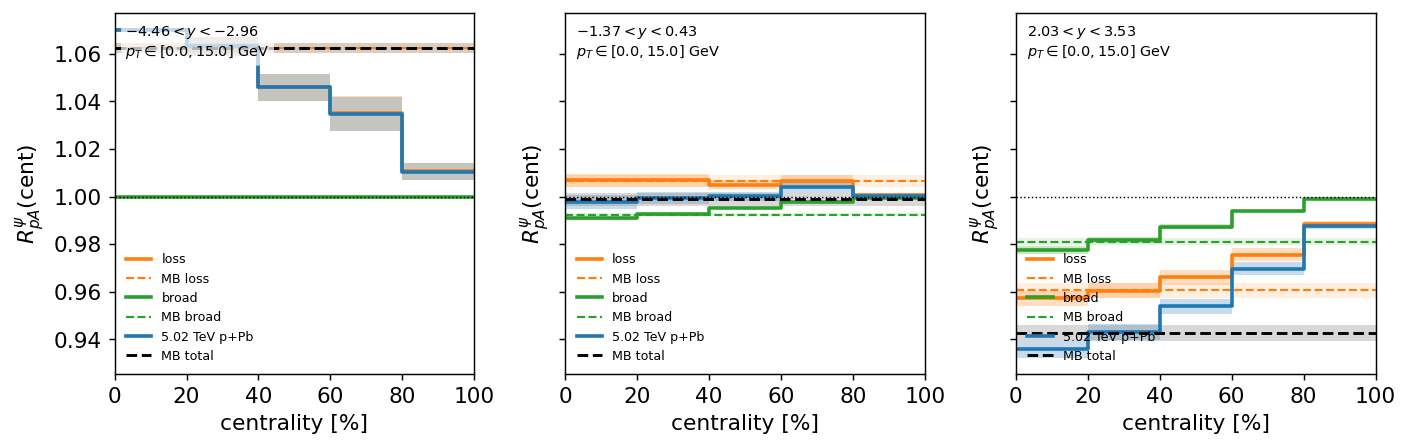

In [ ]:
## eloss, pT broadening and eloss x pT broadening components
pt_range       = (0.0, 15.0)
core_cent_bins = [(0,20),(20,40),(40,60),(60,80),(80,100)]

fig, axes = plt.subplots(1, 3, figsize=(11,3.6), dpi=130, sharey=True)

for ax, yr in zip(axes, RAPIDITY_WINDOWS):
    (labels,
     RL_c, RL_lo, RL_hi,
     RB_c, RB_lo, RB_hi,
     RT_c, RT_lo, RT_hi,
     RMB_loss, RMB_broad, RMB_tot) = rpa_band_vs_centrality(
         P_charmonia, roots5, QP5_base,
         gl5, core_cent_bins,
         yr, pt_range,
         q0_pair=Q0_PAIR,
         p0_scale_pair=(0.9,1.1),
         Ny_bin=16, Npt_bin=32,
         weight_kind="pp",
    )

    note = (
        rf"${yr[0]:.2f}<y<{yr[1]:.2f}$" + "\n"
        rf"$p_T\in[{pt_range[0]:.1f},{pt_range[1]:.1f}]$ GeV"
    )

    plot_RpA_vs_centrality_components_band(
        core_cent_bins, labels,
        RL_c=RL_c, RL_lo=RL_lo, RL_hi=RL_hi, RMB_loss=RMB_loss,
        RB_c=RB_c, RB_lo=RB_lo, RB_hi=RB_hi, RMB_broad=RMB_broad,
        RT_c=RT_c, RT_lo=RT_lo, RT_hi=RT_hi, RMB_tot=RMB_tot,
        show=("loss","broad","total"),
        ax=ax,
        ylabel=r"$R^{\psi}_{pA}(\mathrm{cent})$",
        note=note,
        system_label=r"5.02 TeV p+Pb",
    )

fig.tight_layout()
plt.savefig(
    f'R_eloss_broad_pA_vs_cent_charmonia_5TeV_pT({pt_range[0]:.1f},{pt_range[1]:.1f}).pdf',
    dpi=300, bbox_inches='tight'
)